# DSCI 503 - Homework 04
### Jeffery Boczkaja

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt

## Problem 1: Sample Mean and Variance

In [2]:
x = np.array([10,16,26,12,17,22,14,12,21,16])
n = len(x)
mean = np.sum(x)/n
diff = np.array(abs(x-mean))
var = np.sum(diff**2)/(n-1)
print("Sample Mean: ",mean)
print("Sample Variance",var)

Sample Mean:  16.6
Sample Variance 25.6


In [3]:
mean_np = np.mean(x)
var_np = np.var(x, ddof=1)
print("Sample Mean: ",mean_np)
print("Sample Variance: ",var_np)

Sample Mean:  16.6
Sample Variance:  25.6


## Problem 2: Scoring a Regression Model

In [4]:
def find_sse(true_y,pred_y):
    sse = np.sum(np.square(np.subtract(true_y,pred_y)))
    return sse

In [5]:
true_y = [22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2]
pred_1 = [21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9]
pred_2 = [20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4]
print("Model 1 SSE:",round(find_sse(true_y,pred_1),2))
print("Model 2 SSE:",round(find_sse(true_y,pred_2),2))

Model 1 SSE: 22.66
Model 2 SSE: 19.9


## Problem 3: Scoring a Classification Model

In [6]:
def find_accuracy(true_y,pred_y):
    true_y=np.asarray(true_y)
    pred_y=np.asarray(pred_y)
    acc_arr=(true_y == pred_y)
    correct_arr=np.count_nonzero(acc_arr==True)
    return correct_arr/len(acc_arr)

In [7]:
true_diag=np.asarray(["P","P","N","N","P","N","N","N","P","N","N","N","N","P","P","N","N","N","N","N"])
pred_diag=np.asarray(["N","P","N","P","P","N","P","N","P","N","N","N","P","P","P","N","N","N","P","N"])
print("Model Accuracy: "+str(find_accuracy(true_diag,pred_diag)))

Model Accuracy: 0.75


In [8]:
true_labels=np.asarray(["dog","dog","cat","dog","cat","cat","cat","dog","cat","cat","dog","cat","cat","dog","dog","dog","dog","cat","cat","cat","dog","dog","cat","cat"])
pred_labels=np.asarray(["dog","dog","cat","dog","cat","dog","cat","dog","cat","cat","dog","cat","cat","dog","cat","dog","dog","cat","dog","cat","dog","dog","cat","cat"])
print("Model Accuracy: "+str(find_accuracy(true_labels,pred_labels)))

Model Accuracy: 0.875


## Problem 4: Classification Report

In [9]:
def classification_report(true_y, pred_y):
    true_y=np.asarray(true_y)
    pred_y=np.asarray(pred_y)
    classes=np.unique(true_y)
    negative_class=classes[0]
    positive_class=classes[1]
    accuracy=find_accuracy(true_y,pred_y)
    TP1=(true_y == positive_class)
    TP2=(pred_y ==positive_class)
    TP_acc=TP1[TP2]
    TP=np.count_nonzero(TP_acc==True)
    TN1=(true_y == negative_class)
    TN2=(pred_y==negative_class)
    TN_acc=TN1[TN2]
    TN=np.count_nonzero(TN_acc==True)
    FP_acc=TN1[TP2]
    FP=np.count_nonzero(FP_acc==True)
    FN_acc=TN2[TP1]
    FN=np.count_nonzero(FN_acc==True)
    positive_precision=(TP/(TP+FP))
    positive_recall=(TP/(TP+FN))
    negative_precision=(TN/(TN+FN))
    negative_recall=(TN/(TN+FP))
    print("Accuracy:", round(accuracy, 4))
    print("Positive Precision:", round(positive_precision, 4))
    print("Positive Recall:", round(positive_recall, 4))
    print("Negative Precision:", round(negative_precision, 4))
    print("Negative Recall:", round(negative_recall, 4))

In [10]:
classification_report(true_diag,pred_diag)

Accuracy: 0.75
Positive Precision: 0.5556
Positive Recall: 0.8333
Negative Precision: 0.9091
Negative Recall: 0.7143


In [11]:
classification_report(true_labels,pred_labels)

Accuracy: 0.875
Positive Precision: 0.8333
Positive Recall: 0.9091
Negative Precision: 0.9167
Negative Recall: 0.8462


## Problem 5: Transformation of Random Variables

In [12]:
np.random.seed(1)
X = np.random.normal(loc=0, scale=0.4, size=25000)
Y = np.exp(X)
mean_X = np.mean(X)
std_X = np.std(X, ddof=1)
mean_Y = np.mean(Y)
std_Y = np.std(Y, ddof=1)
print("Sample Mean of X:", round(mean_X, 4))
print("Sample Std Dev of X:", round(std_X, 4))
print("Sample Mean of Y:", round(mean_Y, 4))
print("Sample Std Dev of Y:", round(std_Y, 4))

Sample Mean of X: 0.0025
Sample Std Dev of X: 0.4002
Sample Mean of Y: 1.0862
Sample Std Dev of Y: 0.4537


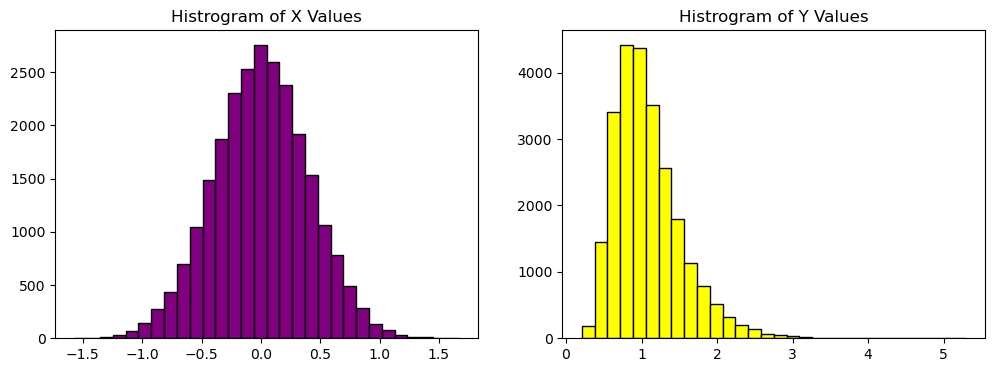

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].hist(X,bins=30,edgecolor='black',color='purple',)
axes[0].set_title('Histrogram of X Values')
axes[1].hist(Y,bins=30,edgecolor='black',color='yellow',)
axes[1].set_title('Histrogram of Y Values')
plt.show()

In [14]:
prob_less_than_0_5 = np.mean(Y < 0.5)
prob_less_than_1 = np.mean(Y < 1.0)
prob_less_than_2 = np.mean(Y < 2.0)
print("Probability that Y is less than 0.5: {:.4f}".format(prob_less_than_0_5))
print("Probability that Y is less than 1.0: {:.4f}".format(prob_less_than_1))
print("Probability that Y is less than 2.0: {:.4f}".format(prob_less_than_2))

Probability that Y is less than 0.5: 0.0410
Probability that Y is less than 1.0: 0.4969
Probability that Y is less than 2.0: 0.9574


## Problem 6: Stochastic Linear Relationship

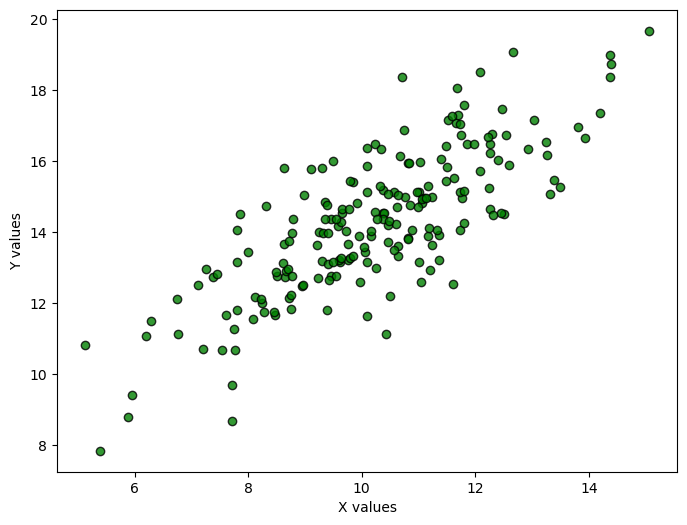

In [15]:
np.random.seed(1)
arr_len = 200
x_vals = np.random.normal(10,2,[arr_len]) 
errors = np.random.normal(0,1.2,[arr_len])
y_vals = 5.1 + 0.9 * x_vals + errors
plt.figure(figsize=(8,6))
plt.scatter(x_vals,y_vals,alpha=0.8,edgecolors='black',c='green')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

In [16]:
diff_x = x_vals - np.mean(x_vals)
diff_y = y_vals - np.mean(y_vals)
numerator = np.sum(np.multiply(diff_x,diff_y))
denominator = np.sqrt(np.sum(np.square(diff_x)) * np.sum(np.square(diff_y)))
r = numerator/denominator
print('Correlation between X and Y :'+"{0:>7.4f}".format(r))

Correlation between X and Y : 0.7861


## Problem 7: Relationship between Life Expectancy and Per Capitia GDP

In [17]:
 import pandas as pd
 df = pd.read_csv('gapminder_data.txt', sep='\t')
 country = df.country.values
 year = df.year.values
 continent = df.continent.values
 population = df.population.values
 life_exp = df.life_exp.values
 pcgdp = df.gdp_per_cap.values
 gini = df.gini.values
 df = None

In [18]:
continent_list = ['africa', 'americas', 'asia', 'europe']
color_list = ['orange', 'blue', 'red', 'green']

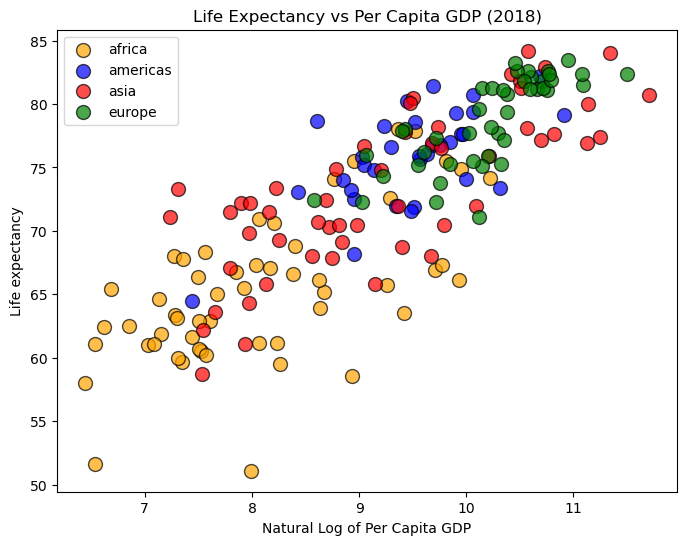

In [19]:
fig,ax = plt.subplots(figsize=(8, 6))
for cont, color in zip(continent_list, color_list):
    sel = (continent == cont) & (year == 2018)
    ax.scatter(np.log(pcgdp[sel]), life_exp[sel], s=100, c=color, alpha=0.7, edgecolors='black')
    ax.set_label(cont)    
ax.set_xlabel('Natural Log of Per Capita GDP')
ax.set_ylabel('Life expectancy')
ax.set_title('Life Expectancy vs Per Capita GDP (2018)')
plt.legend(['africa','americas','asia','europe'])
plt.show()

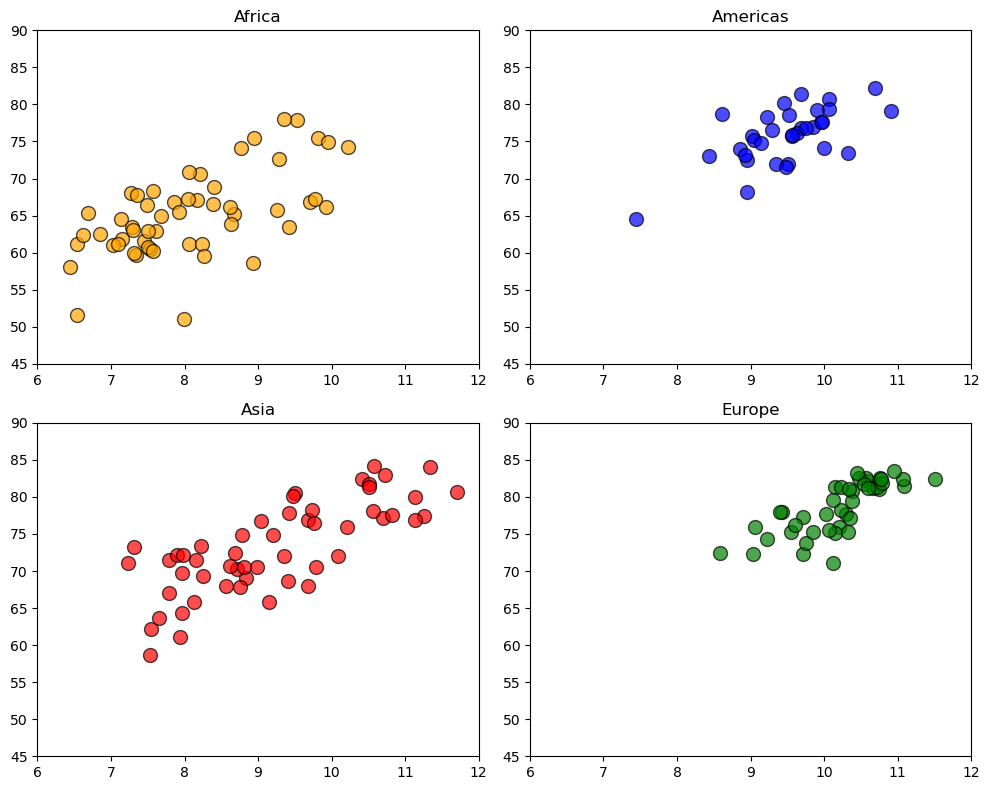

In [20]:
plt.figure(figsize=(10, 8))
for i, cont in enumerate(continent_list):
    sel = (continent == cont) & (year == 2018)
    plt.subplot(2, 2, i + 1)
    plt.scatter(np.log(pcgdp[sel]), life_exp[sel], s=100, alpha=0.7, edgecolors='black', facecolors=color_list[i])
    plt.title(cont.title())
    plt.xlim(6, 12)
    plt.ylim(45, 90)
plt.tight_layout()
plt.show()

## Problem 8: Trends by Country

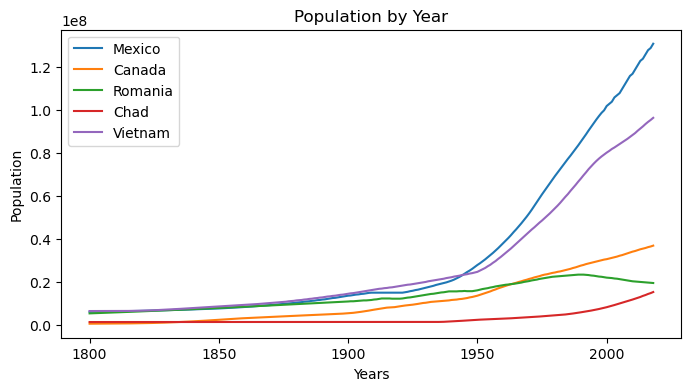

In [21]:
data = pd.read_csv('gapminder_data.txt', delimiter='\t')
countries = ['Mexico', 'Canada', 'Romania', 'Chad', 'Vietnam']
filtered_data = data[data['country'].isin(countries)]
plt.figure(figsize=[8, 4])
for country in countries:
    country_data = filtered_data[filtered_data['country'] == country]
    plt.plot(country_data['year'], country_data['population'], label=country)
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population by Year')
plt.legend()
plt.show()

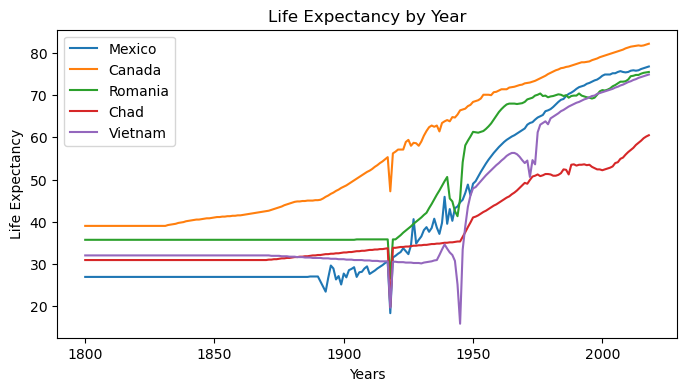

In [22]:
plt.figure(figsize=[8, 4])
for country in countries:
    country_data = filtered_data[filtered_data['country'] == country]
    plt.plot(country_data['year'], country_data['life_exp'], label=country)
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Year')
plt.legend()
plt.show()